In [1]:
import sklearn
import pandas as pd
from sklearn import *

X, y = sklearn.datasets.load_wine(return_X_y = True, as_frame = True)

In [2]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [3]:
y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023440 )

In [ ]:
selectedK = 5

In [33]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=selectedK)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
cm = sklearn.metrics.confusion_matrix(y_test, y_pred, labels=[0,1,2])
print(cm)

[[11  0  0]
 [ 2 19  6]
 [ 3  6  7]]


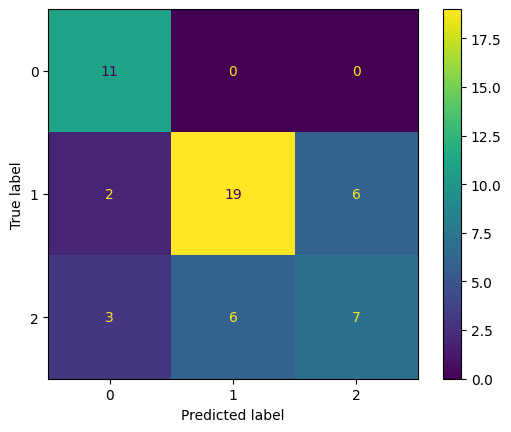

In [34]:
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0,1,2])
disp.plot()

## Let's find the neighbour given a test example

In [35]:
X_test.iloc[0].values

array([ 12.37,   1.63,   2.3 ,  24.5 ,  88.  ,   2.22,   2.45,   0.4 ,
         1.9 ,   2.12,   0.89,   2.78, 342.  ])

In [36]:
distances, NeighbourIdxInTrainingData = neigh.kneighbors([X_test.iloc[0].values],selectedK,return_distance=True)
print(NeighbourIdxInTrainingData)
X_train.iloc[NeighbourIdxInTrainingData[0]]

[[ 70 122  61  32  96]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
126,12.43,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352.0
94,11.62,1.99,2.28,18.0,98.0,3.02,2.26,0.17,1.35,3.25,1.16,2.96,345.0
111,12.52,2.43,2.17,21.0,88.0,2.55,2.27,0.26,1.22,2.00,0.90,2.78,325.0
117,12.42,1.61,2.19,22.5,108.0,2.00,2.09,0.34,1.61,2.06,1.06,2.96,345.0
122,12.42,4.43,2.73,26.5,102.0,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365.0


## We visualize the decision of the kNN classifier

In [37]:
mixedDF = X_train.append(X_test.iloc[0],ignore_index=True)

<ipython-input-37-4ab1275093b0>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mixedDF = X_train.append(X_test.iloc[0],ignore_index=True)


In [38]:
from sklearn.manifold import TSNE
Embedded = TSNE(n_components=2, learning_rate='auto',
                   init='random', perplexity=4).fit_transform(mixedDF)
# Embedded = TSNE(n_components=2, learning_rate='auto',
#                     init='random', perplexity=3).fit_transform(X_train)


In [39]:
colorMp = list(y_train.values)

### Let's visualize the training dataset

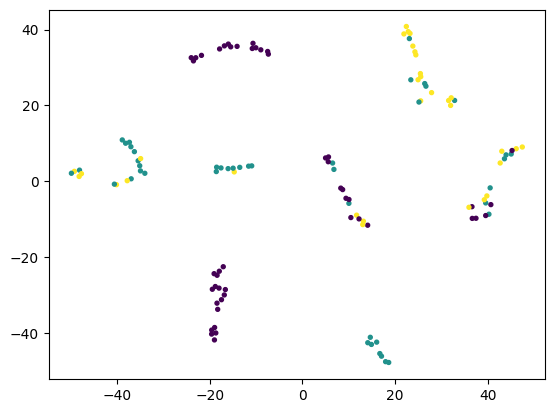

In [40]:
plt.scatter(Embedded[0:-1,0],Embedded[0:-1,1],c=colorMp,s=8)

### Let's add in the test sample

Text(18.030445098876953, -41.445491790771484, 'A point from \nthe test set')

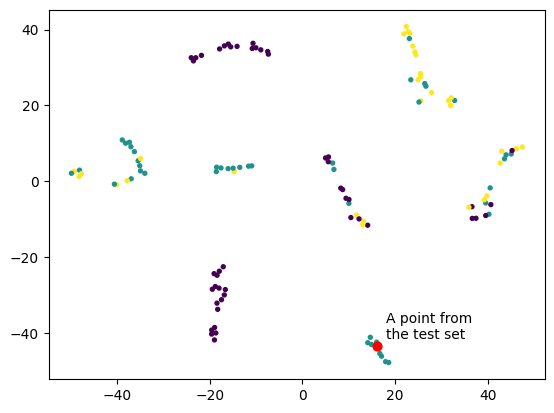

In [41]:
plt.scatter(Embedded[0:-1,0],Embedded[0:-1,1],c=colorMp,s=8)
plt.scatter(Embedded[-1,0],Embedded[-1,1], c='red', s = 40)
plt.annotate(F"A point from \nthe test set",(Embedded[-1,0] + 2,Embedded[-1,1] + 2))

### Let's add in its neighbors

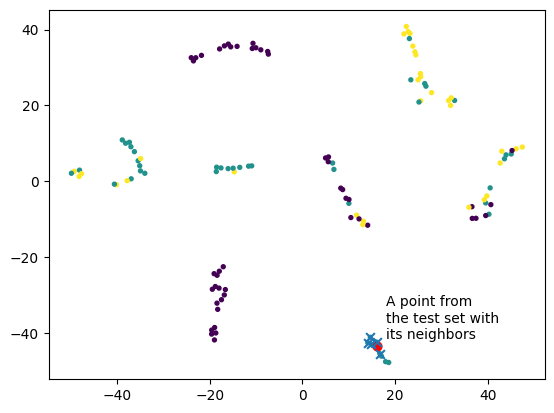

In [42]:
from matplotlib import markers
plt.scatter(Embedded[0:-1,0],Embedded[0:-1,1],c=colorMp,s=8)
plt.scatter(Embedded[-1,0],Embedded[-1,1], c='red', s = 40)
plt.annotate(F"A point from \nthe test set with \nits neighbors",(Embedded[-1,0] + 2,Embedded[-1,1] + 2))
plt.scatter(Embedded[NeighbourIdxInTrainingData[0],0],
            Embedded[NeighbourIdxInTrainingData[0],1], s=40, marker='x')

## Let's focus on the neighbors of the test sample.

Text(16.030445, -43.44549, 'A point from \nthe test set with \nits neighbors')

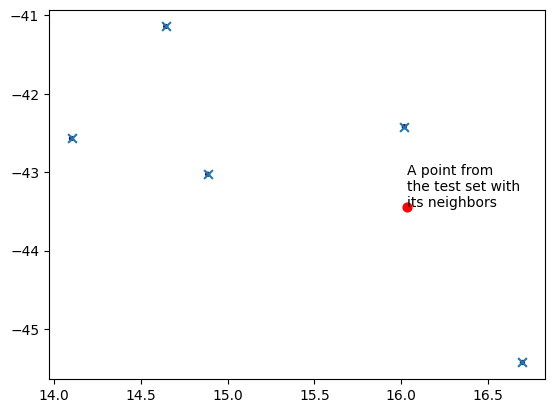

In [43]:
plt.scatter(Embedded[NeighbourIdxInTrainingData[0],0],
            Embedded[NeighbourIdxInTrainingData[0],1],
            c=[colorMp[i] for i in NeighbourIdxInTrainingData[0]], s=8)
plt.scatter(Embedded[NeighbourIdxInTrainingData[0],0],
            Embedded[NeighbourIdxInTrainingData[0],1], s=40, marker='x')
plt.scatter(Embedded[-1,0],Embedded[-1,1], c='red', s = 40)
plt.annotate(F"A point from \nthe test set with \nits neighbors",(Embedded[-1,0],Embedded[-1,1]))